Text(0.02, 0.06, 'Mean(μ): Adj Close    0.209\ndtype: float64%\nSD(σ): Adj Close    2.5\ndtype: float64%\nSkewness: Adj Close   -0.688\ndtype: float64\nKurtosis: Adj Close    11.435\ndtype: float64')

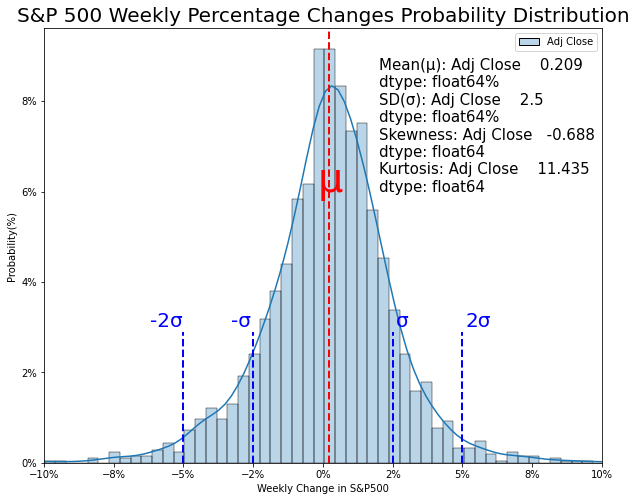

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

market_data = web.DataReader('^GSPC', 'yahoo', dt.datetime(1970, 1, 1),
                             dt.datetime.today())
sp500 = market_data.resample('W').first().pct_change().dropna()
sp500 = pd.DataFrame(sp500["Adj Close"])

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(sp500, kde=True, stat='probability', alpha=.3, ax=ax)
mean = sp500["Adj Close"].mean()
std = sp500["Adj Close"].std()
plt.axvline(x=mean, c='r', linestyle='--', lw=2)
plt.axvline(x=std, ymax=.3, c='b', linestyle='--', lw=2)
plt.axvline(x=-std, ymax=.3, c='b', linestyle='--', lw=2)
plt.axvline(x=2 * std, ymax=.3, c='b', linestyle='--', lw=2)
plt.axvline(x=-2 * std, ymax=.3, c='b', linestyle='--', lw=2)
ax.set_xbound(lower=-.1, upper=.1)
plt.text(mean - .004, .060, 'μ', c='r', size=40)
plt.text(std + .001, .03, 'σ', c='b', size=20)
plt.text(-std - .008, .03, '-σ', c='b', size=20)
plt.text(2 * std + .001, .03, '2σ', c='b', size=20)
plt.text(-2 * std - .012, .03, '-2σ', c='b', size=20)
plt.xlabel("Weekly Change in S&P500")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.ylabel("Probability(%)")
plt.title("S&P 500 Weekly Percentage Changes Probability Distribution",
          size=20)
plt.text(.02,
         .060,
         "Mean(μ): " + str(np.round(sp500.mean() * 100, decimals=3)) +
         '%\nSD(σ): ' + str(np.round(sp500.std() * 100, decimals=3)) +
         '%\nSkewness: ' + str(np.round(sp500.skew(), decimals=3)) +
         '\nKurtosis: ' + str(np.round(sp500.kurtosis(), decimals=3)),
         size=15)